In [68]:
"""
      Start with necessary library import
"""

import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
import sys
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler;
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score;
from sklearn.linear_model import LinearRegression;
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor;
from sklearn.svm import SVR;
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error;
import sklearn as sk
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [69]:
# access the chosen data

# first, read the "insurance.csv" file
insurance = pd.read_csv("insurance.csv");

# copy the data for secure for changes
df = insurance.copy();

# first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
# checking columns in data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [71]:
# checking data information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
# checking general statistics of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
# checking null values in data
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [74]:
"""
      after all information and statistics, checking relations with  graphics
"""

'\n      after all information and statistics, checking relations with  graphics\n'

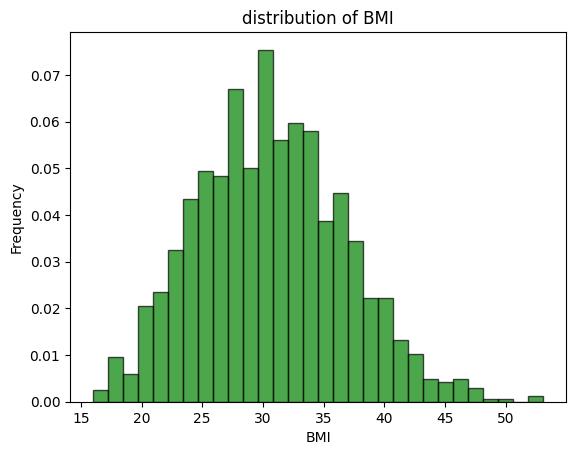

In [75]:
# Examine the distribution of Bmi (Body Mass Index)
plt.hist(df['bmi'], bins=30, density=True, alpha=0.7, color='green', edgecolor='black')
plt.title('distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [76]:
# BMI Scatter Plot graphics shows mostly in body mass index of 25-35

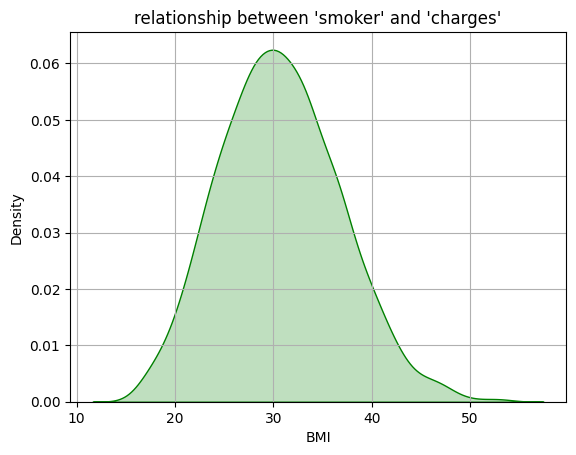

In [77]:
# Examine the relationship between “smoker” and “charges”
sns.kdeplot(df['bmi'], fill=True, color='green')
plt.title("relationship between 'smoker' and 'charges'")
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [78]:
# BMI Denstiy graphics shows mostly in body mass index of 25-35

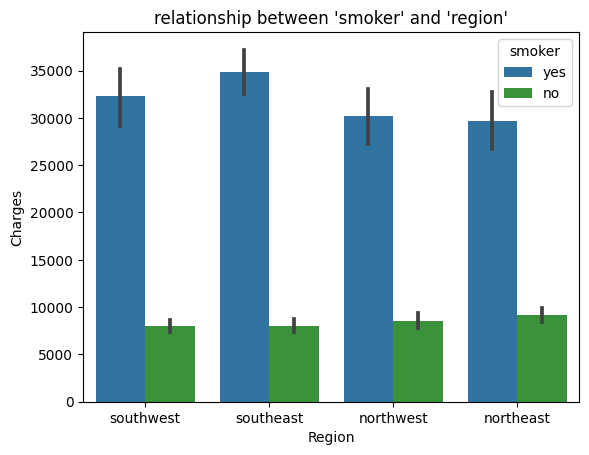

In [79]:
# Examine the relationship between “smoker” and “region”
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette=['tab:blue','tab:green'])
plt.title("relationship between 'smoker' and 'region'")
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [80]:
# Thanks to this graphic we see the relation between smoker with region

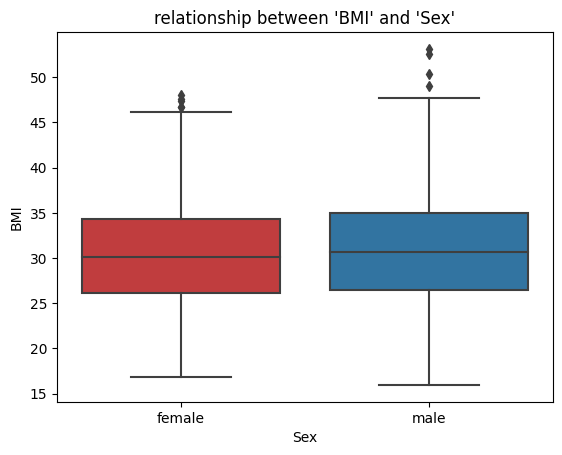

In [81]:
# Examine the relationship between “bmi” and “sex”
sns.boxplot(x='sex', y='bmi', data=df, palette=['tab:red','tab:blue'])
plt.title("relationship between 'BMI' and 'Sex'")
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

In [82]:
# Thanks to this graphic we see the relation between BMI and sex

In [83]:
# Find the "region" with the most "children"
sum_children = df.groupby("region")["children"].sum()
most_region = sum_children.idxmax()
number_most = sum_children[most_region]
print(f"most children in {most_region}, number of the children is {number_most}.")

most children in southeast, number of the children is 382.


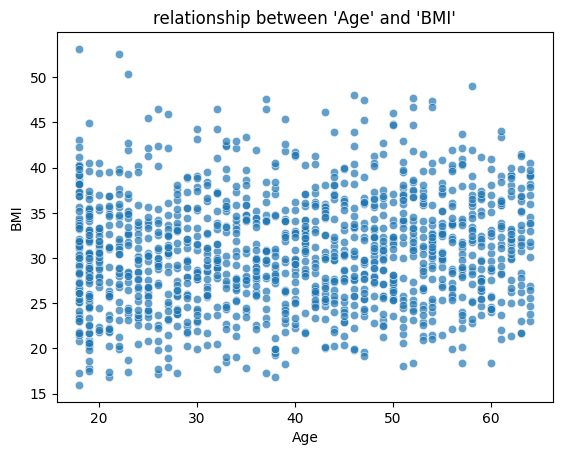

In [84]:
# Examine the relationship between “age” and “bmi”
sns.scatterplot(data=df, x='age', y='bmi', alpha=0.7)
plt.title("relationship between 'Age' and 'BMI'")
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [85]:
# Thanks to this graphic we see the relation bmi and age

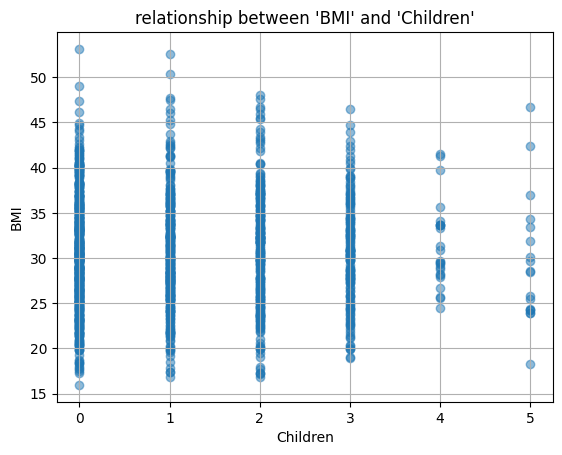

In [86]:
# Examine the relationship between “bmi” and “children”
plt.scatter(df["children"], df["bmi"], alpha=0.5)
plt.title("relationship between 'BMI' and 'Children'")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

In [87]:
# Thanks to this graphic we see the relation with bmi and children numbers, it is not exist.

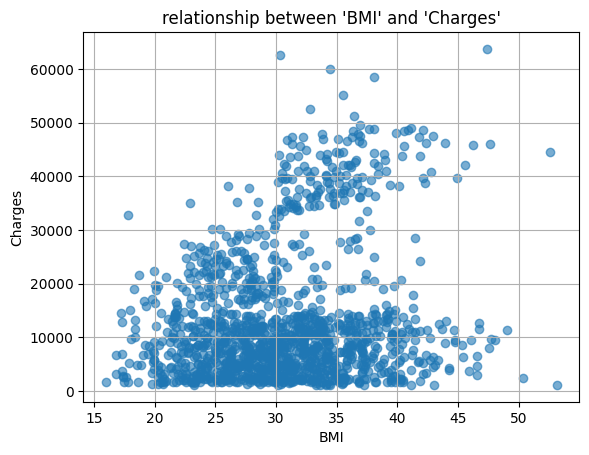

In [88]:
# Examine the relationship between “bmi” and “charges”
plt.scatter(df["bmi"], df["charges"], alpha=0.6)
plt.title("relationship between 'BMI' and 'Charges'")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

In [89]:
# Thanks to this graphic we see the relation with bmi and charges

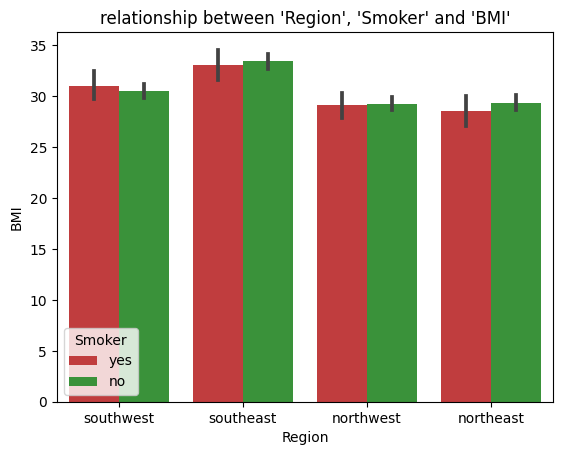

In [90]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
sns.barplot(x="region", y="bmi", hue="smoker",palette=['tab:red','tab:green'], data=df)
plt.title("relationship between 'Region', 'Smoker' and 'BMI'")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
#plt.grid(True)
plt.show()

In [91]:
# Thanks to this graphic we see the relation with smoker with bmi and region

In [92]:
# Use Label Encoding and One-Hot Encoding techniques to deal with categorical variables
label_encoder = preprocessing.LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [93]:
y = df["charges"]
X = df.drop(["charges"], axis=1)

print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [94]:
# Split your dataset into X_train,X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [95]:
# Scale the dataset by normalizing it(used Min-Max Scaling here)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

best_model_score = sys.maxsize
best_model_name = None


# Examine the performances of the selected models using cross validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    if(np.mean(rmse_scores)<best_model_score):
      #Choose the best performing model
        best_model_score = np.mean(rmse_scores)
        best_model_name = model_name
    print(f"{model_name} RMSE: {np.mean(rmse_scores)}")
print(f"Best model is {best_model_name}, RMSE: {best_model_score}")

Linear Regression RMSE: 6029.712876635493
Decision Tree RMSE: 7183.593205110495
Random Forest RMSE: 5073.77013692559
Support Vector Regression RMSE: 12865.345040995959
Best model is Random Forest, RMSE: 5073.77013692559


In [99]:
best_model = RandomForestRegressor()

In [100]:
# Optimize parameters with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [102]:
# Evaluate the optimized model using regression model evaluation metrics
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error  : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"R2 Score  : {r2}")

Mean Squared Error  : 19537229.257070433
Mean Absolute Error : 2509.748332681484
R2 Score  : 0.8478875112041002
